In [2]:
import gzip

gt_count = dict()

with gzip.open("sample.ann.vcf.gz", "rt") as handle:
    for line in handle:
        if line.startswith("#"):
            continue

        row = line.strip().split("\t")
        gt = row[-1].split(":")[0].replace("|", "/")
        if gt not in gt_count:
            gt_count[gt] = 0

        gt_count[gt] += 1

print(gt_count)


{'1/1': 2133, '0/1': 6031, '1/2': 78}


In [6]:
import pandas as pd

df = pd.DataFrame(
{
    "Name" : ["person1", "person2", "person3"], 
    "Systolic" : [ 122, 134, 100], 
    "Diastolic" : [ 79, 88, 76],

}
)
print(df)
print(type(df))


      Name  Systolic  Diastolic
0  person1       122         79
1  person2       134         88
2  person3       100         76
<class 'pandas.core.frame.DataFrame'>


<Axes: title={'center': 'blood pressure'}, xlabel='Name', ylabel='mmHg'>

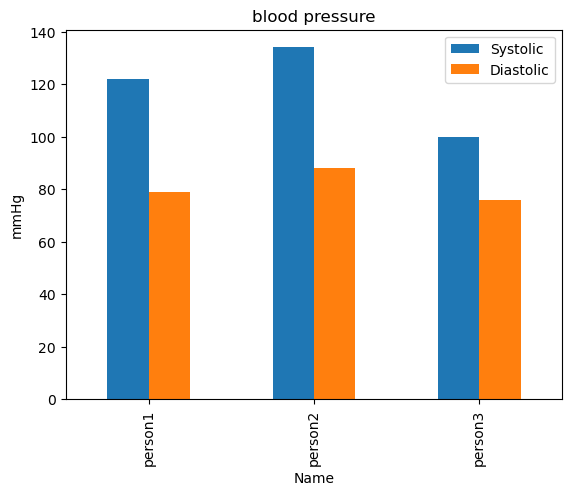

In [13]:
df.plot(
    kind="bar", 
    x="Name",
    y=["Systolic", "Diastolic"],
    ylabel="mmHg", 
    title="blood pressure"
)


In [15]:
gt_data = {'1/1': 2133, '0/1': 6031, '1/2': 78}

df_data = {"genotype" : gt_data.keys(), "genotype_count" : gt_data.values()}

df = pd.DataFrame(df_data)
print(df)

  genotype  genotype_count
0      1/1            2133
1      0/1            6031
2      1/2              78


<Axes: title={'center': 'genotype count'}, xlabel='genotype', ylabel='counts'>

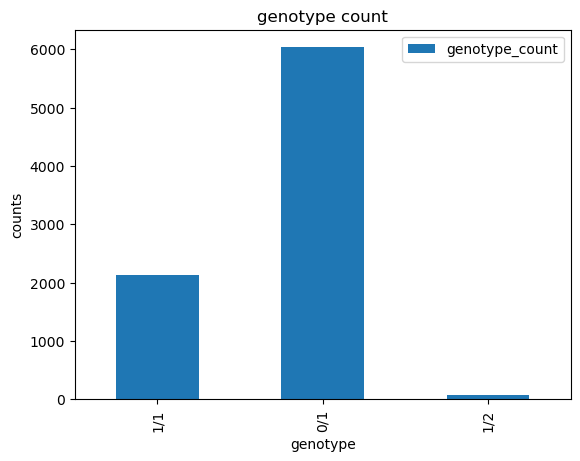

In [17]:
df.plot(
    kind="bar",

    x="genotype",
    y=["genotype_count"],
    title="genotype count",
    ylabel="counts",
    )